In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

## Data Augmenatation

In [30]:
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import img_to_array, array_to_img, load_img
   
# # Initialising the ImageDataGenerator class.
# # We will pass in the augmentation parameters in the constructor.
# datagen = ImageDataGenerator(
#         rotation_range = 40,
#         shear_range = 0.2,
#         zoom_range = 0.2,
#         horizontal_flip = True,
#         brightness_range = (0.5, 1.5))
    
# # Loading a sample image 
# img = load_img('img/Fine/fine5.jpg') 
# # Converting the input sample image to an array
# x = img_to_array(img)
# # Reshaping the input image
# x = x.reshape((1, ) + x.shape) 
   
# # Generating and saving 5 augmented samples 
# # using the above defined parameters. 
# i = 0
# for batch in datagen.flow(x, batch_size = 1,
#                           save_to_dir ='fine', 
#                           save_prefix ='image', save_format ='jpg'):
#     i += 1
#     if i > 5:
#         break

## Resizing and Saving back the Image

In [31]:
# from PIL import Image
# import os 
# import PIL 
# import glob

# # Resizing damaged boxes downloaded images into (250,250) size
# print("Damaged Images Resizing ....")
# for i in range(1,31):
#     j = str(i)
#     img_path = "damaged\image"+j+".jpg"
#     image = Image.open(img_path) 
#     print(image.size)
#     resized_image = image.resize((250,250)) 
#     print(resized_image.size)
#     resized_image.save(img_path)


# # Resizing fine boxes downloaded images into (250,250) size
# print("Fine Images Resizing ....")
# for i in range(1,31):
#     j = str(i)
#     img_path = "fine\image"+j+".jpg"
#     image = Image.open(img_path) 
#     print(image.size)
#     resized_image = image.resize((250,250)) 
#     print(resized_image.size)
#     resized_image.save(img_path)





In [32]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [33]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 127 files belonging to 2 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

In [36]:
batch

(array([[[[249.     , 255.     , 255.     ],
          [249.     , 255.     , 255.     ],
          [250.88281, 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         [[243.21094, 249.21094, 249.21094],
          [244.14186, 250.14186, 250.14186],
          [246.0586 , 251.9924 , 251.9924 ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         [[250.53125, 254.64844, 253.70703],
          [249.67947, 253.79666, 252.85526],
          [248.87251, 252.9897 , 252.0483 ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         ...,
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.    

In [37]:
len(batch)

2

In [40]:
batch[0].shape

(32, 256, 256, 3)

In [41]:
batch[1]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

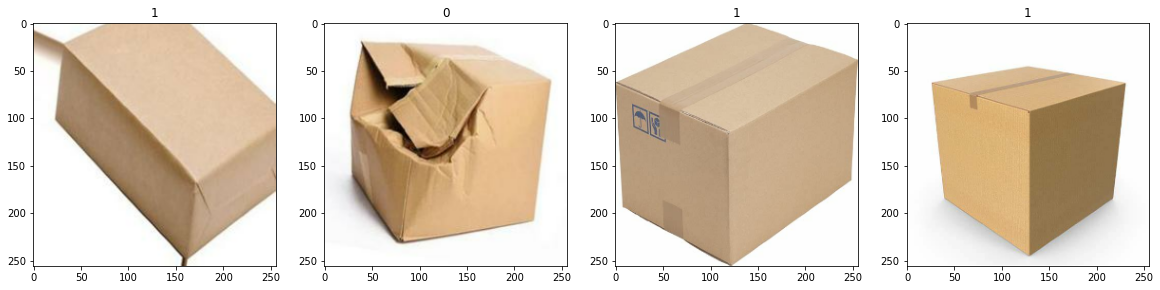

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 : Fine 


0 : Damaged

## Scaling the Data

In [45]:
data = data.map(lambda x,y: (x/255, y))

In [50]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

## Split Data

In [60]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [61]:
len(data)

4

In [62]:
train_size

2

In [63]:
val_size


1

In [64]:
test_size

1

In [65]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [68]:
len(test)

1

## Building the Deep Learning Model

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [70]:
model = Sequential()

In [71]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training the Model

In [74]:
logdir='logs'

In [75]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=18, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/18
2/2 [==============================] - 3s 2s/step - loss: 0.3292 - accuracy: 0.8438 - val_loss: 0.1332 - val_accuracy: 0.9375
Epoch 2/18
2/2 [==============================] - 3s 2s/step - loss: 0.1759 - accuracy: 0.9375 - val_loss: 0.1195 - val_accuracy: 0.9688
Epoch 3/18
2/2 [==============================] - 3s 2s/step - loss: 0.1687 - accuracy: 0.9219 - val_loss: 0.1408 - val_accuracy: 0.9375
Epoch 4/18
2/2 [==============================] - 3s 2s/step - loss: 0.1400 - accuracy: 0.9375 - val_loss: 0.1124 - val_accuracy: 0.9688
Epoch 5/18
2/2 [==============================] - 3s 2s/step - loss: 0.1034 - accuracy: 0.9688 - val_loss: 0.0976 - val_accuracy: 0.9688
Epoch 6/18
2/2 [==============================] - 3s 2s/step - loss: 0.1016 - accuracy: 0.9531 - val_loss: 0.0850 - val_accuracy: 0.9688
Epoch 7/18
2/2 [==============================] - 3s 2s/step - loss: 0.0723 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 8/18
2/2 [=========================

In [78]:
hist.history

{'loss': [0.32921862602233887,
  0.17589163780212402,
  0.16873714327812195,
  0.14004886150360107,
  0.10336653888225555,
  0.10156968235969543,
  0.07229037582874298,
  0.032842978835105896,
  0.05061405152082443,
  0.043322548270225525,
  0.05658338963985443,
  0.014542118646204472,
  0.040693722665309906,
  0.04055875912308693,
  0.035826750099658966,
  0.012705562636256218,
  0.03244869410991669,
  0.029342297464609146],
 'accuracy': [0.84375,
  0.9375,
  0.921875,
  0.9375,
  0.96875,
  0.953125,
  1.0,
  1.0,
  0.984375,
  0.984375,
  1.0,
  1.0,
  0.984375,
  0.984375,
  0.984375,
  1.0,
  0.984375,
  0.984375],
 'val_loss': [0.13316136598587036,
  0.11947837471961975,
  0.14078032970428467,
  0.11242138594388962,
  0.0975794792175293,
  0.08502267301082611,
  0.0363398976624012,
  0.05605383589863777,
  0.027261756360530853,
  0.05544981360435486,
  0.06053505092859268,
  0.04987568035721779,
  0.01122177205979824,
  0.04312695562839508,
  0.04081618785858154,
  0.003133908379

### Plotting the Performance

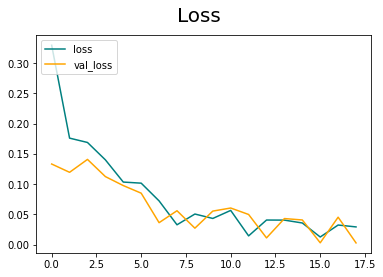

In [79]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

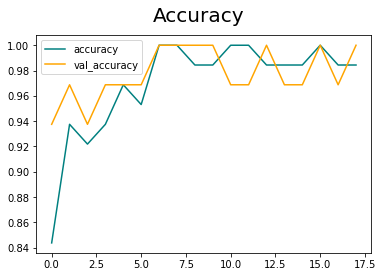

In [80]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating the Model

In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [82]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 3s 3s/step


In [84]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Testing the Model

In [85]:
import cv2

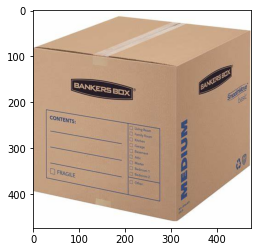

In [90]:
img = cv2.imread('test_fine.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

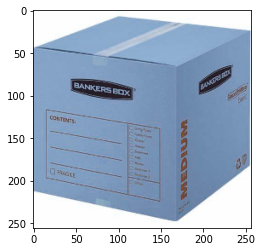

In [91]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 54ms/step


array([[0.99523365]], dtype=float32)

In [93]:
if yhat > 0.5: 
    print(f'Box is Fine')
else:
    print(f'Box is Damaged')

Box is Fine


## Saving the Model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','boxclassifier.h5'))

In [97]:
new_model = load_model('models/boxclassifier.h5')

In [98]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 158ms/step


array([[0.99523365]], dtype=float32)